In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load your dataset from a text file
with open('/content/media_stream.txt', 'r') as file:
    data = [float(line.strip()) for line in file]

In [3]:
# Normalize the dataset
scaler = MinMaxScaler()
dataset = np.array(data).reshape(-1, 1)
dataset = scaler.fit_transform(dataset)

# Split the dataset into training and testing sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [4]:
# Create sequences and labels for training
def create_sequences(dataset, look_back=1):
    sequences, labels = [], []
    for i in range(len(dataset) - look_back):
        sequences.append(dataset[i:i+look_back])
        labels.append(dataset[i+look_back])
    return np.array(sequences), np.array(labels)

look_back = 10  # Window size
train_sequences, train_labels = create_sequences(train_data, look_back)
test_sequences, test_labels = create_sequences(test_data, look_back)

In [5]:
# Build a Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(look_back, 1))))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [6]:
# Train the model
model.fit(train_sequences, train_labels, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
44/44 - 11s - loss: 0.0311 - 11s/epoch - 242ms/step
Epoch 2/10
44/44 - 0s - loss: 0.0132 - 326ms/epoch - 7ms/step
Epoch 3/10
44/44 - 0s - loss: 0.0134 - 370ms/epoch - 8ms/step
Epoch 4/10
44/44 - 0s - loss: 0.0130 - 390ms/epoch - 9ms/step
Epoch 5/10
44/44 - 0s - loss: 0.0130 - 405ms/epoch - 9ms/step
Epoch 6/10
44/44 - 0s - loss: 0.0128 - 470ms/epoch - 11ms/step
Epoch 7/10
44/44 - 0s - loss: 0.0133 - 451ms/epoch - 10ms/step
Epoch 8/10
44/44 - 0s - loss: 0.0127 - 427ms/epoch - 10ms/step
Epoch 9/10
44/44 - 0s - loss: 0.0125 - 438ms/epoch - 10ms/step
Epoch 10/10
44/44 - 0s - loss: 0.0127 - 472ms/epoch - 11ms/step


In [7]:
# Make predictions on test data
test_predictions = model.predict(test_sequences)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions)
test_labels = scaler.inverse_transform(test_labels)

11/11 [==============================] - 1s 4ms/step


In [8]:
import tensorflow as tf
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
mse(test_labels, test_predictions).numpy()

16.530777

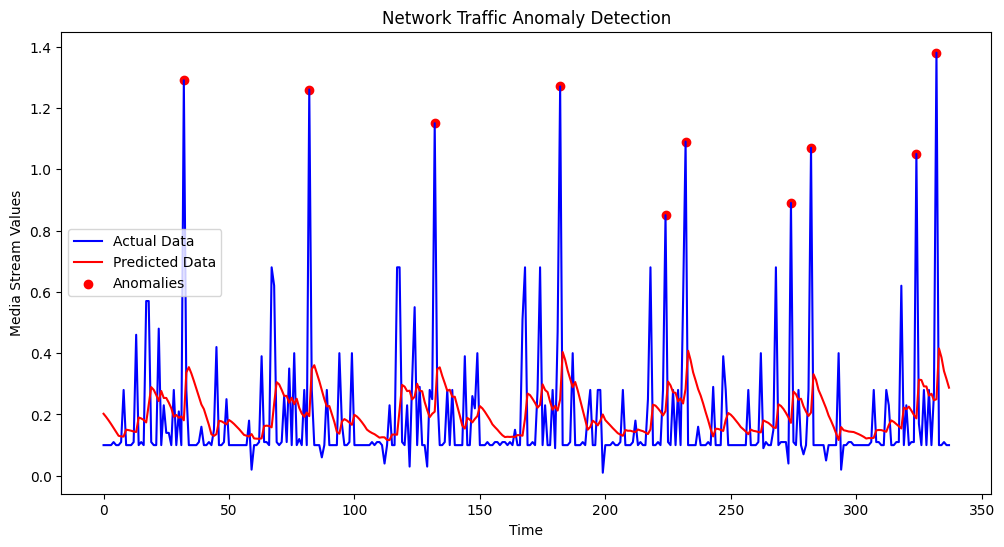

In [10]:
# Plot the test data, predicted data, and anomalies
plt.figure(figsize=(12, 6))
plt.plot(test_labels, label='Actual Data', color='blue')
plt.plot(test_predictions, label='Predicted Data', color='red')

# Define a threshold for anomalies
threshold = 0.6

# # Highlight anomalies in the plot
anomalies = np.abs(test_labels - test_predictions) > threshold
anomaly_indices = np.where(anomalies)[0]
plt.scatter(anomaly_indices, test_labels[anomalies], color='red', marker='o', label='Anomalies')


plt.title('Network Traffic Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Media Stream Values')
plt.legend()
plt.show()